In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('results/test/mattersim_results.csv')

In [41]:
df

,num_atoms,num_parts,avg_part_size,num_mp,energy_error_abs,energy_error_pct,forces_error_max,forces_error_mae,forces_error_mape,forces_error_ratio,forces_error_mse,forces_error_rms,benchmark_time,all_partition_time,avg_partition_time
0,426,60,376.516667,2,0.001221,0.000055,4.046054e-02,2.148698e-03,3.038322,6.391298e-03,2.174882e-05,4.663562e-03,21.398691,4.894699,0.081578
1,426,60,426.000000,3,0.001953,0.000088,8.344650e-07,1.109795e-07,0.000167,3.293786e-07,2.593248e-14,1.610356e-07,0.198998,4.716615,0.078610
2,426,60,426.000000,4,0.001953,0.000088,9.536743e-07,1.216353e-07,0.000198,3.537139e-07,3.094858e-14,1.759221e-07,0.140198,4.452123,0.074202
3,426,60,426.000000,5,0.001953,0.000088,8.344650e-07,1.152793e-07,0.000165,3.619355e-07,2.794699e-14,1.671735e-07,0.144879,4.691720,0.078195
4,426,60,426.000000,6,0.001953,0.000088,1.013279e-06,1.228525e-07,0.000219,3.569957e-07,3.275348e-14,1.809792e-07,0.127728,4.536901,0.075615
5,426,60,426.000000,7,0.001709,0.000077,8.046627e-07,1.134909e-07,0.000202,3.448683e-07,2.676882e-14,1.636118e-07,0.128329,4.240685,0.070678
6,426,60,426.000000,8,0.001953,0.000088,9.685755e-07,1.195421e-07,0.000183,3.721001e-07,3.025506e-14,1.739398e-07,0.108564,4.690669,0.078178
7,1704,60,544.216667,2,0.041016,0.000464,6.855854e-02,1.461516e-03,2.889234,5.038189e-03,1.608898e-05,4.011107e-03,0.267618,3.540228,0.059004
8,1704,60,1057.983333,3,0.010742,0.000122,9.161234e-04,1.549705e-05,0.053520,5.431677e-05,2.531364e-09,5.031266e-05,0.222849,5.434355,0.090573
9,1704,60,1567.100000,4,0.009766,0.000111,5.881535e-06,1.689983e-07,0.000471,5.557539e-07,1.049953e-13,3.240298e-07,0.231375,7.205939,0.120099


## Partitioning

In [42]:
df['avg_part_ratio'] = df['avg_part_size'] / df['num_atoms']
avg_by_mp = df.groupby('num_mp').mean()

Text(0, 0.5, 'Proportion of All Atoms')

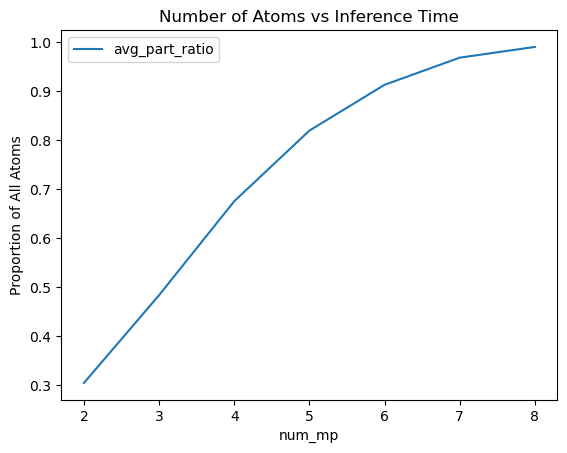

In [43]:
ax = avg_by_mp.plot(y=['avg_part_ratio'])
ax.set_title("Number of Atoms vs Inference Time")
ax.set_ylabel('Proportion of All Atoms')

We want to keep the proportion of all atoms at num_mp=4 low, so that we can accurately measure the forces error. This can be done by increasing number of atoms or number of partitions

## Timing

In [44]:
avg_by_num_atoms = df.groupby('num_atoms').mean()

Text(0, 0.5, 'Time (seconds)')

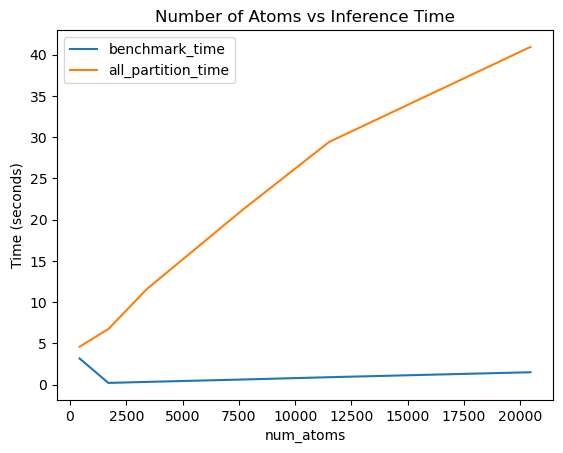

In [45]:
ax = avg_by_num_atoms.plot(y=['benchmark_time', 'all_partition_time'])
ax.set_title("Number of Atoms vs Inference Time")
ax.set_ylabel('Time (seconds)')

## Energy Error

In [46]:
avg_by_mp = df.groupby('num_mp').mean()

(0.0, 1.0)

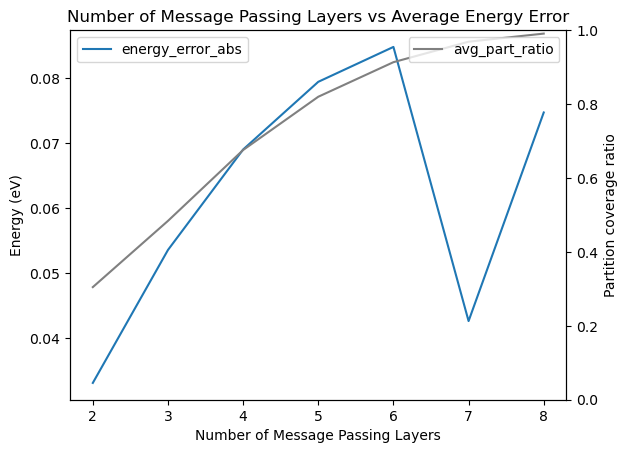

In [47]:
fig, ax1 = plt.subplots()

avg_by_mp.plot(
    y=['energy_error_abs'],
    ax=ax1
)

ax1.set_title("Number of Message Passing Layers vs Average Energy Error")
ax1.set_ylabel("Energy (eV)")
ax1.set_xlabel("Number of Message Passing Layers")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

avg_by_mp['avg_part_ratio'].plot(ax=ax2, color='gray', )
ax2.set_ylabel("Partition coverage ratio")
ax2.legend(loc='upper right')
ax2.set_ylim([0, 1])


## Forces Error

(0.0, 1.0)

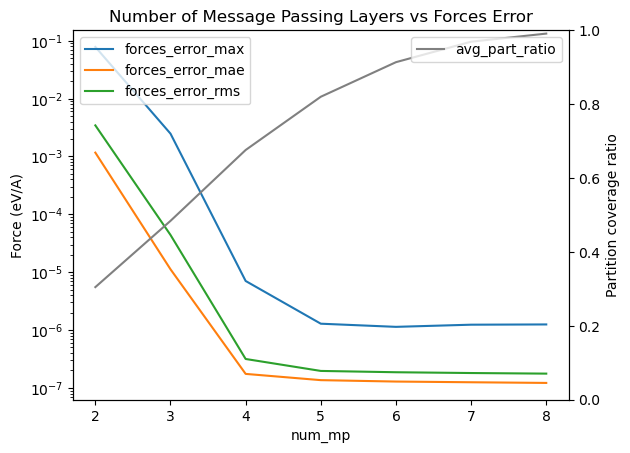

In [48]:
fig, ax1 = plt.subplots()

avg_by_mp[['forces_error_max', 'forces_error_mae', 'forces_error_rms']].plot(
    ax=ax1,
    logy=True
)
ax1.set_title("Number of Message Passing Layers vs Forces Error")
ax1.set_ylabel("Force (eV/A)")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

avg_by_mp['avg_part_ratio'].plot(ax=ax2, color='gray', )
ax2.set_ylabel("Partition coverage ratio")
ax2.legend(loc='upper right')
ax2.set_ylim([0, 1])


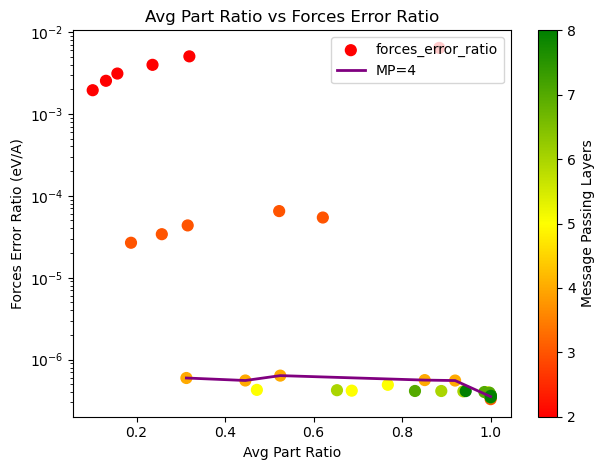

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

mp_value = 4
x_axis_column = 'avg_part_ratio'
y_axis_column = 'forces_error_ratio'

fig, ax1 = plt.subplots()

cmap = mcolors.LinearSegmentedColormap.from_list("RdYlGn", ["red", "yellow", "green"])
norm = mcolors.Normalize(vmin=df['num_mp'].min(), vmax=df['num_mp'].max())

scatter = ax1.scatter(df[x_axis_column], df[y_axis_column],
                     c=df['num_mp'], cmap=cmap, norm=norm,
                     s=60, label=y_axis_column)

mp_filtered_df = df[df['num_mp'] == mp_value]

if not mp_filtered_df.empty:
    mp_filtered_df = mp_filtered_df.sort_values(x_axis_column)
    
    line, = ax1.plot(mp_filtered_df[x_axis_column], mp_filtered_df[y_axis_column],
             'purple', linewidth=2, label=f'MP={mp_value}')

ax1.set_yscale('log')
ax1.set_title(f"{x_axis_column.replace('_', ' ').title()} vs {y_axis_column.replace('_', ' ').title()}")
ax1.set_xlabel(x_axis_column.replace('_', ' ').title())
ax1.set_ylabel(y_axis_column.replace('_', ' ').title() + " (eV/A)")

cbar = plt.colorbar(scatter)
cbar.set_label('Message Passing Layers')
ax1.legend(loc='upper right')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Force (eV/A)')

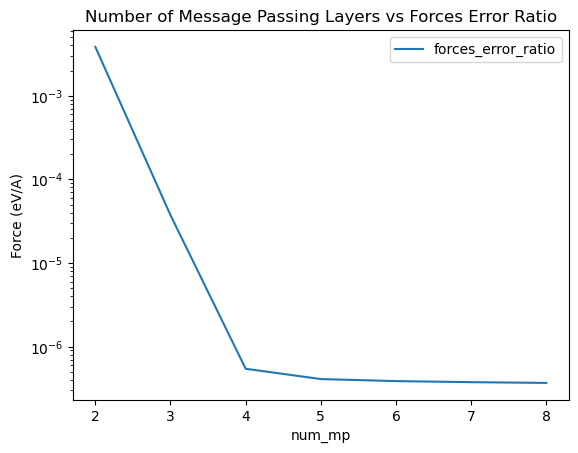

In [50]:
ax = avg_by_mp.plot(y=['forces_error_ratio'], logy=True)
ax.set_title("Number of Message Passing Layers vs Forces Error Ratio")
ax.set_ylabel("Force (eV/A)")